In [57]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn.functional as F

In [70]:
APPLE = 0
BANANA = 1
COCONUT = 2

look_up = [
    [0.1, -0.4, 0.2, 0.5],
    [0.4, 1.4, -1.0, 0.1],
    [1.1, 0.9, 1.1, 0.5]
]

x_train = torch.Tensor([
    [*look_up[APPLE], 1], 
    [*look_up[BANANA], 5], 
    [*look_up[COCONUT], 6]
])

y_train = torch.Tensor([
    [0, 1, 0, 0], 
    [0, 0, 1, 16], 
    [0, 0, 1, 20]
])

In [65]:
num_steps = 20000
learning_rate = 0.01

In [66]:
class Model(torch.nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.layer1 = torch.nn.Linear(5, 3)
        self.layer2a = torch.nn.Linear(3, 3)
        self.layer2b = torch.nn.Linear(3, 1)
        
    def forward(self, x):
        s = F.sigmoid(self.layer1(x))
        v_hat = F.softmax(self.layer2a(s), 1)
        y_hat = self.layer2b(s)
        return torch.cat((v_hat, y_hat), 1)

In [67]:
model = Model()
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

loss_history = []
for step in range(num_steps):
    y_hat = model(x_train)
    loss = criterion(y_hat, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    loss_history.append(loss.data.numpy())

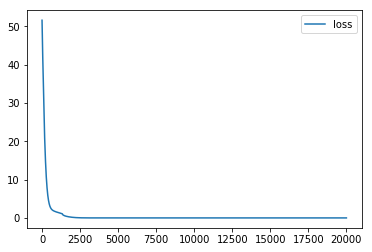

In [68]:
plt.plot(loss_history, label="loss")
plt.legend()
plt.show()

In [81]:
x_test = torch.Tensor([
    [*look_up[APPLE], 3], 
    [*look_up[COCONUT], 5]]
)

predict = model(x_test)
print(x_test)
print(predict)

tensor([[ 0.1000, -0.4000,  0.2000,  0.5000,  3.0000],
        [ 1.1000,  0.9000,  1.1000,  0.5000,  5.0000]])
tensor([[ 5.8390e-05,  9.9983e-01,  1.1292e-04,  1.4695e-01],
        [ 4.9416e-06,  7.8113e-06,  9.9999e-01,  1.9981e+01]])
